# Multiple Linear Regression on Student Performance Dataset

**Author : Alexandre Lalle**

This notebook demonstrates multiple linear regression using the Student Performance Dataset, which consists of 10,000 student records. Each record includes key predictors influencing academic performance, such as:

- **Hours Studied**: Total hours spent studying.
- **Previous Scores**: Scores from prior tests.
- **Extracurricular Activities**: Participation in extracurricular activities (Yes or No).
- **Sleep Hours**: Average sleep per day.
- **Sample Question Papers Practiced**: Number of practice question papers.

The target variable is the **Performance Index**, ranging from 10 to 100, with higher values reflecting better student outcomes.

Dataset Source: [Kaggle - Student Performance Dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data)


### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from regression import LinearRegression, grid_search_lr
from regression.preprocessing import remove_outliers, normalize_features , train_test_split

import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset

In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
# Viewing the first 5 entries
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# Providing some info regarding the columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
# Describing some of the stats of the data
data.describe() 

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Visualizing the Data

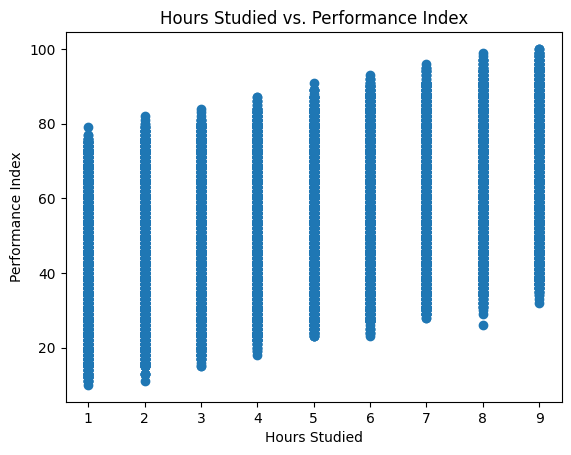

In [6]:
# Scatter Plot: Hours Studied vs. Performance Index
plt.scatter(data['Hours Studied'], data['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')
plt.show()

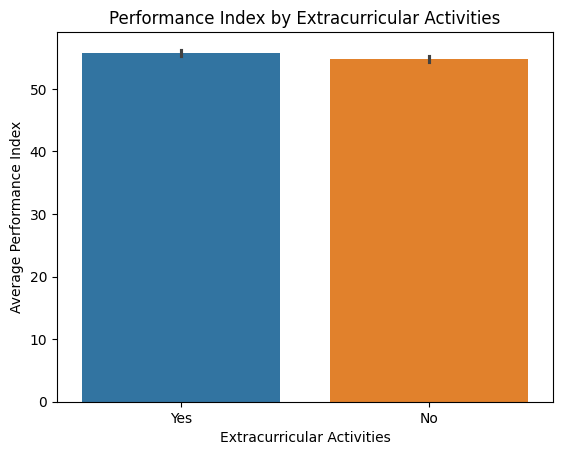

In [7]:
# Bar Plot: Average Performance Index for Extracurricular Activities
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=data, palette='tab10')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Performance Index')
plt.title('Performance Index by Extracurricular Activities')
plt.show()

In [8]:
# Encoding the Categorical Column
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
data['Extracurricular Activities'].head()

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64

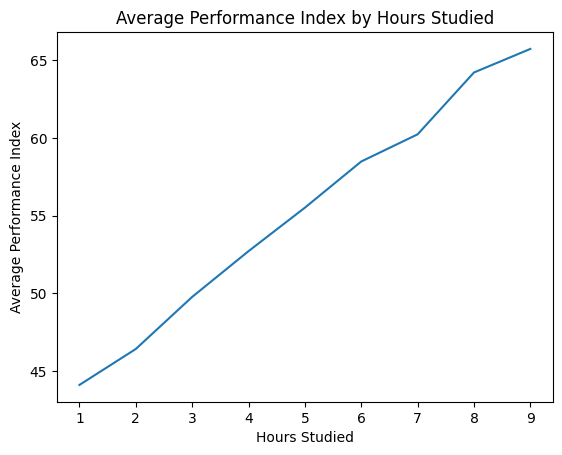

In [9]:
# Visualize the average performance index across different levels of the "Hours Studied" variable
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

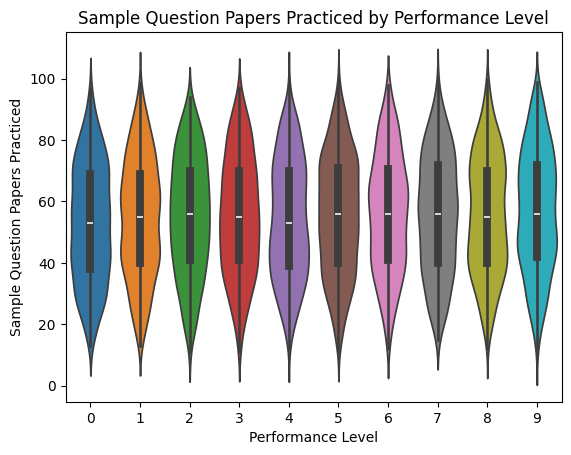

In [10]:
sns.violinplot(y='Performance Index', x='Sample Question Papers Practiced', data=data, palette='tab10')
plt.xlabel('Performance Level')
plt.ylabel('Sample Question Papers Practiced')
plt.title('Sample Question Papers Practiced by Performance Level')
plt.show()

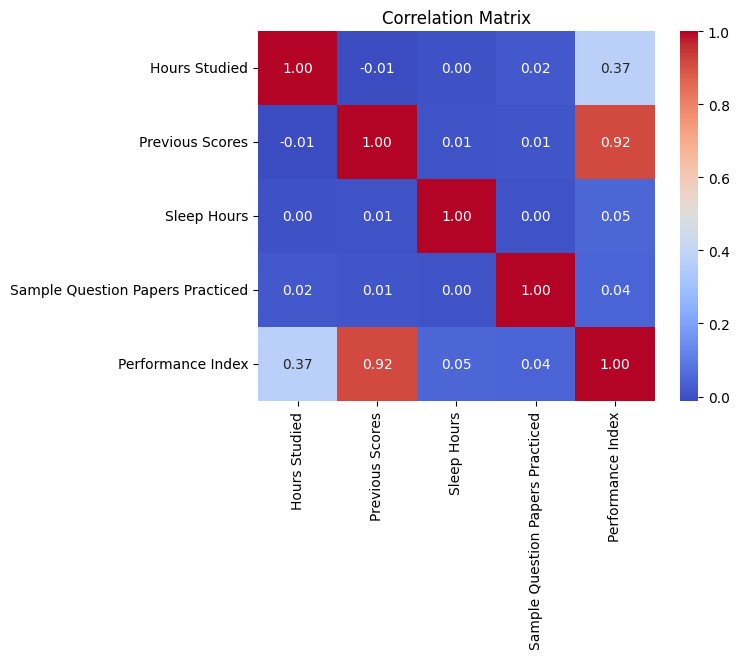

In [11]:
# Heatmap: Correlation Matrix
correlation_matrix = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

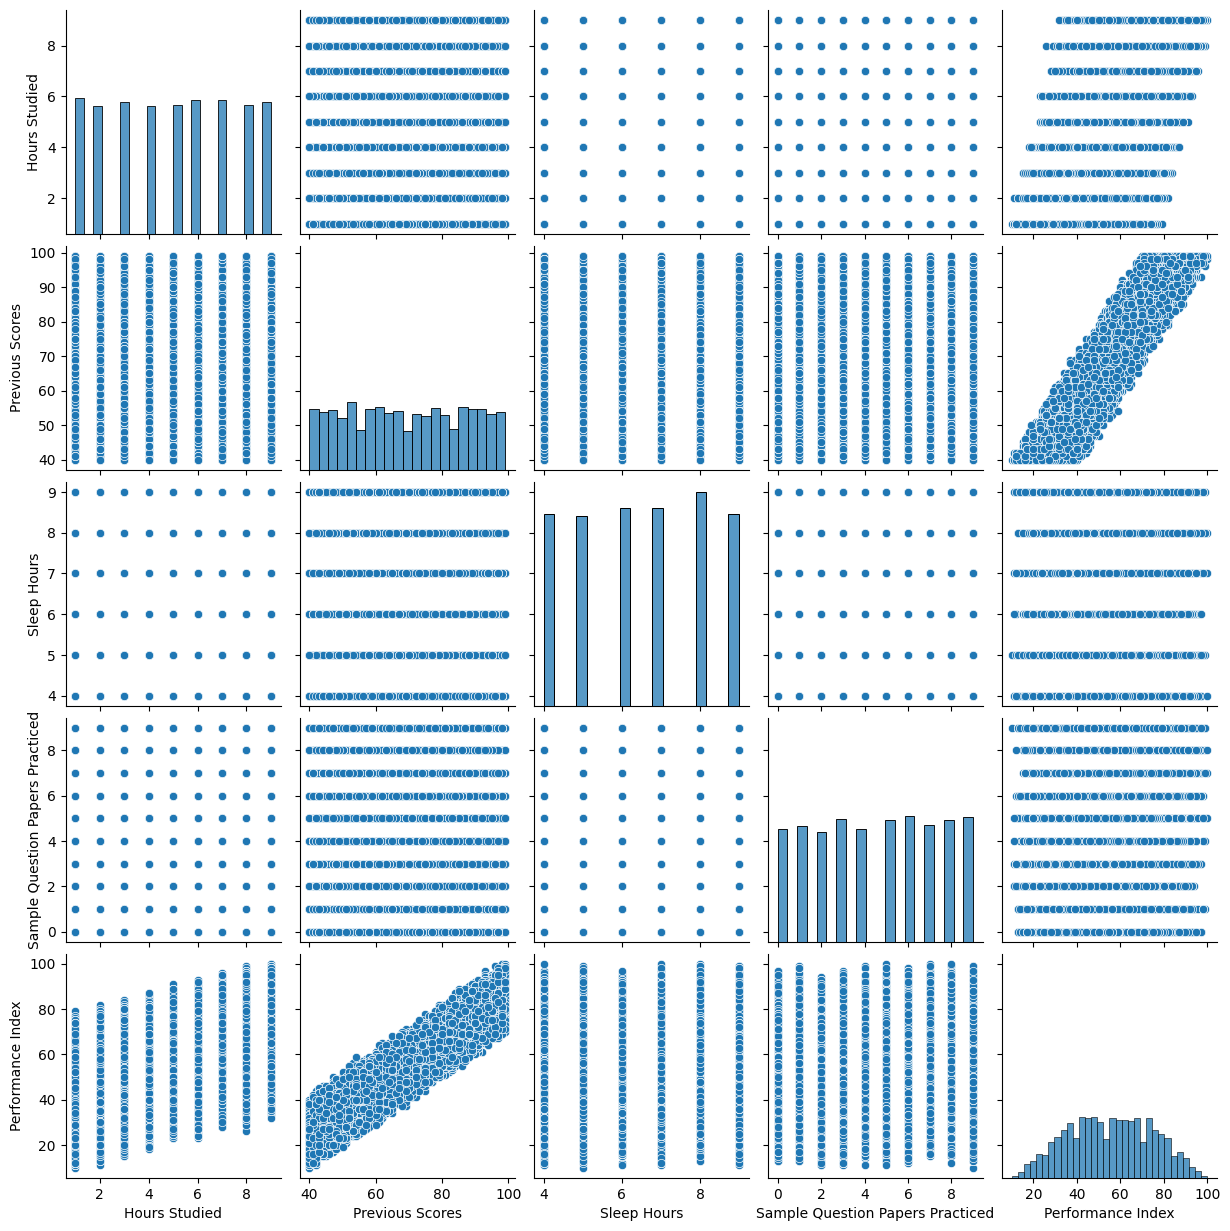

In [12]:
# Visualize pairwise relationships between the numerical variables
sns.pairplot(data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.show()

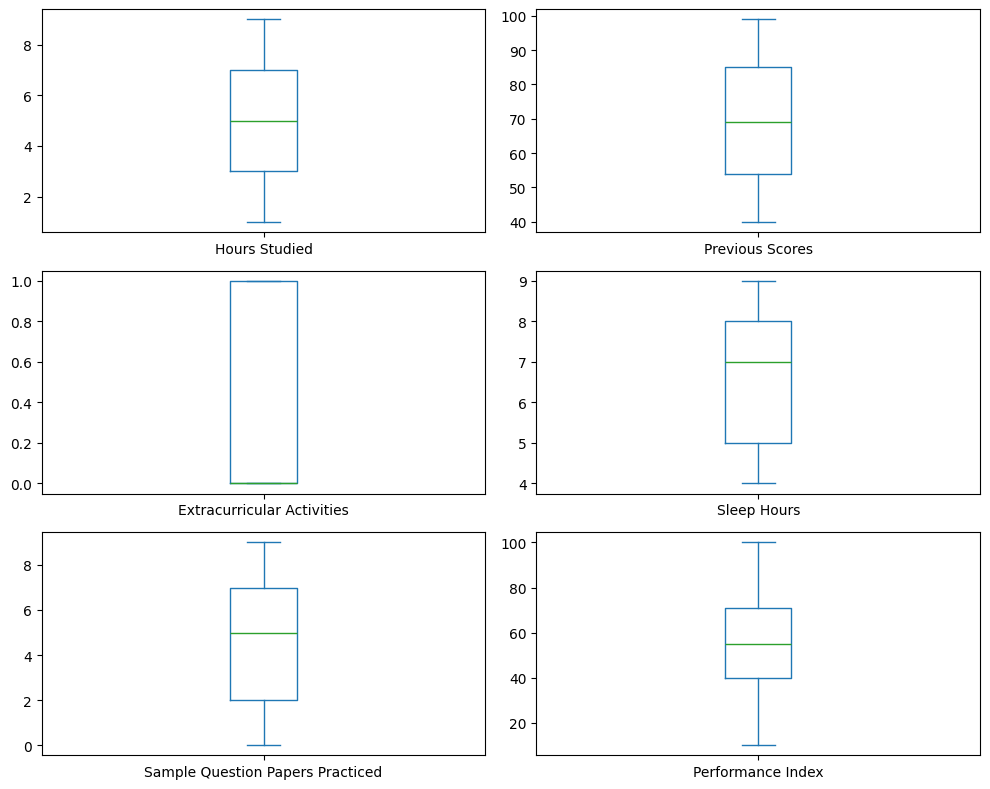

In [13]:
data.plot(kind='box', subplots=True, layout=(3,2), figsize=(10,8))
plt.tight_layout()
plt.show()

## Training the Data

In [14]:
# Splitting data into Indipendent and Dependent Variable
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [15]:
# Normalize all features except 'Extracurricular Activities'
features_to_normalize = X.columns.difference(['Extracurricular Activities'])
print(features_to_normalize.to_list())
X[features_to_normalize] = normalize_features(X[features_to_normalize])
X.head()

['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Sleep Hours']


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1,1.456205,-1.249754
1,-0.383481,0.723913,0,-1.492294,-0.900982
2,1.161410,-1.063626,1,0.276805,-0.900982
3,0.002742,-1.005963,1,-0.902594,-0.900982
4,0.775188,0.320275,0,0.866505,0.145333


In [16]:
# Splitting data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5)
(2000, 5)
(8000,)
(2000,)


### Approach 1: Tuning Parameters with `grid_search_lr()`

In [17]:
# Define parameter grid
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01],
    'l1_ratio': [0.0, 0.5, 1.0],
    'l2_ratio': [0.0, 0.5, 1.0],
    'max_iter': [3000, 5000],
}

# Perform custom grid search
best_params, best_score = grid_search_lr(X_train, y_train, X_test, y_test, param_grid)

In [18]:
print("Best Parameters:", best_params)
print("Best R² Score:", best_score)

Best Parameters: {'learning_rate': 0.01, 'max_iter': 5000, 'tol': 1e-06, 'normalize': False, 'l1_ratio': 0.0, 'l2_ratio': 0.0, 'remove_outliers': False}
Best R² Score: 0.9888167435785334


### Approach 2: Direct Use of the `LinearRegression` Model

In [19]:
# Initialize and train model
model = LinearRegression(
    learning_rate=0.01,
    max_iter=3000,
    tol=1e-6,
    l1_ratio=0.1,
    l2_ratio=0.1,
)

# Fit model
model.fit(X_train, y_train)

In [20]:
# Make predictions on train set
y_pred = model.predict(X_train)
r2_score = model.score(y_train, y_pred)
mse = np.mean((y_train - y_pred) ** 2)

print("_____________________________________________")
print("|The model performance on training set ")
print("|____________________________________________")
print(f"|R2 score is {r2_score:.4f}")
print(f"|MSE is {mse:.4f}")
print("|____________________________________________")


_____________________________________________
|The model performance on training set 
|____________________________________________
|R2 score is 0.9390
|MSE is 22.4524
|____________________________________________


In [21]:
# Make predictions on test set
y_pred = model.predict(X_test)
r2_score = model.score(y_test, y_pred)
mse = np.mean((y_test - y_pred) ** 2)

print("_____________________________________________")
print("|The model performance on testing set ")
print("|____________________________________________")
print(f"|R2 score is {r2_score:.4f}")
print(f"|MSE is {mse:.4f}")
print("|____________________________________________")

_____________________________________________
|The model performance on testing set 
|____________________________________________
|R2 score is 0.9392
|MSE is 22.7470
|____________________________________________


# Analysing Results

In [22]:
# Print model parameters
print("\nModel Parameters:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Number of iterations: {model.n_iter_}")


Model Parameters:
Coefficients: [ 6.01663655 14.56760455  5.22565759  0.71608334  0.39429401]
Intercept: 51.30
Number of iterations: 5000


In [23]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_pred-y_test})
comparison_df

,Actual,Predicted,Difference
0,63.0,62.832742,-0.167258
1,78.0,75.134619,-2.865381
2,20.0,28.064576,8.064576
3,47.0,48.769593,1.769593
4,24.0,25.259466,1.259466
...,...,...,...
1995,48.0,47.154296,-0.845704
1996,51.0,48.607945,-2.392055
1997,44.0,42.994664,-1.005336
1998,20.0,23.584000,3.584000


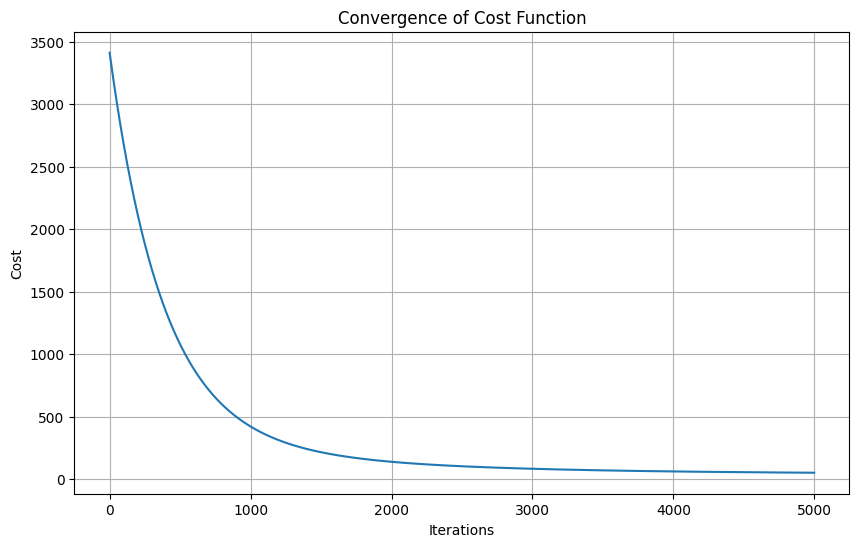

In [24]:
# Plot cost history
model.plot_convergence()

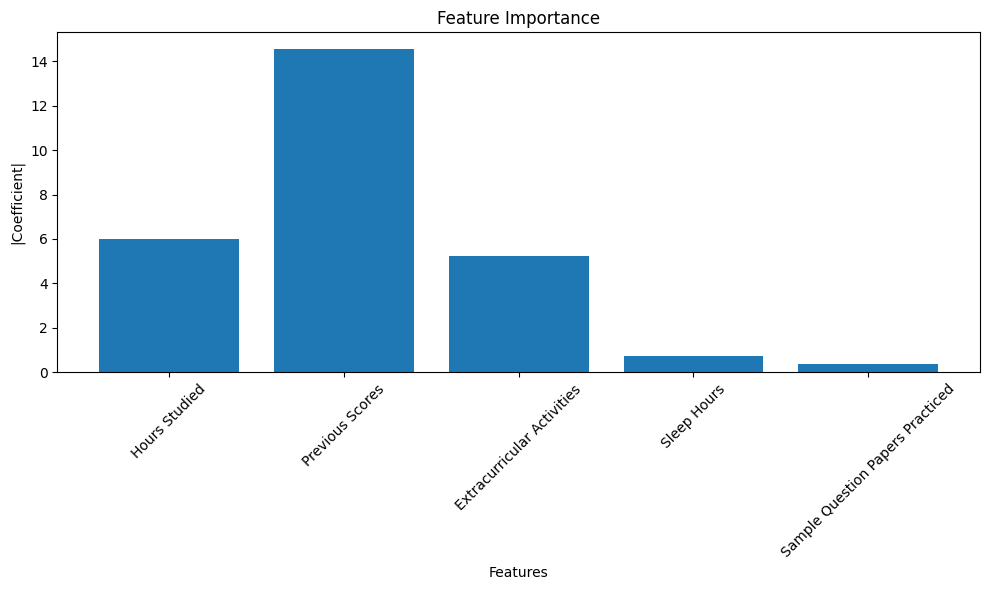

In [25]:
# Plot feature importance
model.plot_feature_importance(data.columns[:-1])